In [1]:
'''
Plan to find out
1. numeric columns: 0s, find columns if 0s > 95%
2. text columns: find columns if na > 80%

'''

'\nPlan to find out\n1. numeric columns: 0s, find columns if 0s > 95%\n2. text columns: find columns if na > 80%\n\n'

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import skew

In [3]:
## Read data

data_train_raw = pd.read_csv('data/train.csv')
data_train = data_train_raw.drop(['SalePrice'], axis=1)
data_test = pd.read_csv('data/test.csv')

data_all = pd.concat((data_train, data_test), sort=False).reset_index(drop=True)
data_all.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  

[2 rows x 80 columns]

In [4]:
## basic info

print("train shape: ", np.shape(data_train))
print("test shape: ", np.shape(data_test))
print("overall shape: ", np.shape(data_all))
print("\n")
print("number features: ", len(list(data_all.select_dtypes(['int64','float64']))))
print("text features: ", len(list(data_all.select_dtypes(['object']))))
print("Total NA columns: ", len(list(data_all.columns[data_all.isna().any()])))
print("NA columns", "\n", (list(data_all.columns[data_all.isna().any()])))

train shape:  (1460, 80)
test shape:  (1459, 80)
overall shape:  (2919, 80)


number features:  37
text features:  43
Total NA columns:  34
NA columns 
 ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [5]:
# na columns that are number
data_all.describe().transpose().sort_values(by=['std'], ascending=False)

count          mean          std     min     25%     50%  \
LotArea        2919.0  10168.114080  7886.996359  1300.0  7478.0  9453.0   
Id             2919.0   1460.000000   842.787043     1.0   730.5  1460.0   
MiscVal        2919.0     50.825968   567.402211     0.0     0.0     0.0   
GrLivArea      2919.0   1500.759849   506.051045   334.0  1126.0  1444.0   
BsmtFinSF1     2918.0    441.423235   455.610826     0.0     0.0   368.5   
TotalBsmtSF    2918.0   1051.777587   440.766258     0.0   793.0   989.5   
BsmtUnfSF      2918.0    560.772104   439.543659     0.0   220.0   467.0   
2ndFlrSF       2919.0    336.483727   428.701456     0.0     0.0     0.0   
1stFlrSF       2919.0   1159.581706   392.362079   334.0   876.0  1082.0   
GarageArea     2918.0    472.874572   215.394815     0.0   320.0   480.0   
MasVnrArea     2896.0    102.201312   179.334253     0.0     0.0     0.0   
BsmtFinSF2     2918.0     49.582248   169.205611     0.0     0.0     0.0   
WoodDeckSF     2919.0     93.709832   126.526589     0.0     0.0     0.0   
OpenPorchSF    2919.0     47.486811    67.575493     0.0     0.0    26.0   
EnclosedPorch  2919.0     23.098321    64.244246     0.0     0.0     0.0   
ScreenPorch    2919.0     16.062350    56.184365     0.0     0.0     0.0   
LowQualFinSF   2919.0      4.694416    46.396825     0.0     0.0     0.0   
MSSubClass     2919.0     57.137718    42.517628    20.0    20.0    50.0   
PoolArea       2919.0      2.251799    35.663946     0.0     0.0     0.0   
YearBuilt      2919.0   1971.312778    30.291442  1872.0  1953.5  1973.0   
GarageYrBlt    2760.0   1978.113406    25.574285  1895.0  1960.0  1979.0   
3SsnPorch      2919.0      2.602261    25.188169     0.0     0.0     0.0   
LotFrontage    2433.0     69.305795    23.344905    21.0    59.0    68.0   
YearRemodAdd   2919.0   1984.264474    20.894344  1950.0  1965.0  1993.0   
MoSold         2919.0      6.213087     2.714762     1.0     4.0     6.0   
TotRmsAbvGrd   2919.0      6.451524     1.569379     2.0     5.0     6.0   
OverallQual    2919.0      6.089072     1.409947     1.0     5.0     6.0   
YrSold         2919.0   2007.792737     1.314964  2006.0  2007.0  2008.0   
OverallCond    2919.0      5.564577     1.113131     1.0     5.0     5.0   
BedroomAbvGr   2919.0      2.860226     0.822693     0.0     2.0     3.0   
GarageCars     2918.0      1.766621     0.761624     0.0     1.0     2.0   
Fireplaces     2919.0      0.597122     0.646129     0.0     0.0     1.0   
FullBath       2919.0      1.568003     0.552969     0.0     1.0     2.0   
BsmtFullBath   2917.0      0.429894     0.524736     0.0     0.0     0.0   
HalfBath       2919.0      0.380267     0.502872     0.0     0.0     0.0   
BsmtHalfBath   2917.0      0.061364     0.245687     0.0     0.0     0.0   
KitchenAbvGr   2919.0      1.044536     0.214462     0.0     1.0     1.0   

                   75%       max  
LotArea        11570.0  215245.0  
Id              2189.5    2919.0  
MiscVal            0.0   17000.0  
GrLivArea       1743.5    5642.0  
BsmtFinSF1       733.0    5644.0  
TotalBsmtSF     1302.0    6110.0  
BsmtUnfSF        805.5    2336.0  
2ndFlrSF         704.0    2065.0  
1stFlrSF        1387.5    5095.0  
GarageArea       576.0    1488.0  
MasVnrArea       164.0    1600.0  
BsmtFinSF2         0.0    1526.0  
WoodDeckSF       168.0    1424.0  
OpenPorchSF       70.0     742.0  
EnclosedPorch      0.0    1012.0  
ScreenPorch        0.0     576.0  
LowQualFinSF       0.0    1064.0  
MSSubClass        70.0     190.0  
PoolArea           0.0     800.0  
YearBuilt       2001.0    2010.0  
GarageYrBlt     2002.0    2207.0  
3SsnPorch          0.0     508.0  
LotFrontage       80.0     313.0  
YearRemodAdd    2004.0    2010.0  
MoSold             8.0      12.0  
TotRmsAbvGrd       7.0      15.0  
OverallQual        7.0      10.0  
YrSold          2009.0    2010.0  
OverallCond        6.0       9.0  
BedroomAbvGr       3.0       8.0  
GarageCars         2.0       5.0  
Firepla

In [6]:
## explore 0s of numeric columns
## show columns if 0s > 95%
columns = list(data_all.select_dtypes(['int64','float64']))
nonzero_ls = np.count_nonzero(data_all.select_dtypes(['int64','float64']), axis=0)
totalrow = len(data_all)
ls = []
for col, val in zip(columns, nonzero_ls):
    #print(col, totalrow-val, round((totalrow-val)/totalrow*100, 3))
    ls.append([col, totalrow-val, round((totalrow-val)/totalrow*100, 3)]) 

df = pd.DataFrame(ls, columns = ['num_features', '0s', 'percent']) 
print(df[(df.percent >= 80)].sort_values(by=['percent'], ascending=False))

#ignore_columns = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal']          #95%
#ignore_columns = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', \
#                  'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch']  #80%

     num_features    0s  percent
33       PoolArea  2906   99.555
31      3SsnPorch  2882   98.732
15   LowQualFinSF  2879   98.630
34        MiscVal  2816   96.471
18   BsmtHalfBath  2742   93.936
32    ScreenPorch  2663   91.230
10     BsmtFinSF2  2571   88.078
30  EnclosedPorch  2460   84.275


In [7]:
## explore na of text columns
## show columns if na > 80%

columns = list(data_all.select_dtypes(['object']))
na_ls = list(data_all[columns].isna().sum())
totalrow = len(data_all)
ls = []

for col, val in zip(columns, na_ls):
    ls.append([col, totalrow-val, round(val/totalrow*100, 3)]) 

df = pd.DataFrame(ls, columns = ['txt_features', 'Nan', 'percent']) 
df[(df.percent >= 80)].sort_values(by=['percent'], ascending=False)

#ignore_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

txt_features  Nan  percent
38       PoolQC   10   99.657
40  MiscFeature  105   96.403
2         Alley  198   93.217
39        Fence  571   80.439

In [8]:
## explore num columns
## show skewness
columns = list(data_all.select_dtypes(['int64','float64']))
#zero_columns = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal']    # exclude many 0s, 95%
zero_columns = ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', \
                'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch']   # exclude many 0s, 80%
columns = [x for x in columns if x not in zero_columns]
ls = []

for col in columns:
    ls.append([col, abs(skew(data_all[col].dropna()))]) 

df = pd.DataFrame(ls, columns = ['num_features', 'skewness']) 
print(df[(df.skewness >= 3)].sort_values(by=['skewness'], ascending=False))
print('')
print(df[(df.skewness <= 3) & (df.skewness >= 2)].sort_values(by=['skewness'], ascending=False))

#ignore_columns = ['LotArea', 'KitchenAbvGr']   ## 95%: ['BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch', 'BsmtHalfBath']
#log_columns = ['MasVnrArea', 'OpenPorchSF']

    num_features   skewness
3        LotArea  12.822431
19  KitchenAbvGr   4.302254

   num_features  skewness
8    MasVnrArea  2.601240
26  OpenPorchSF  2.535114


In [9]:
## explore na of text columns
## show occurence

columns = list(data_all.select_dtypes(['object']))
na_columns =  ['PoolQC', 'MiscFeature', 'Alley', 'Fence']    # exclude many na
columns = [x for x in columns if x not in na_columns]
ls = []
totalrow = len(data_all)

for col in columns:
    df_txt = data_all[col].value_counts().dropna()
    if len(df_txt) > 2:
        ls.append([col, df_txt.sum(), len(df_txt), round(df_txt[0]/totalrow*100, 3), round(df_txt[1]/totalrow*100, 3)]) 
    else:
        ls.append([col, df_txt.sum(), len(df_txt), round(df_txt[0]/totalrow*100, 3), 0]) 

df = pd.DataFrame(ls, columns = ['txt_features', 'sum', 'cat', 'occur_1st', 'occur_2nd']) 
df[(df.occur_1st >= 90) & (df.occur_2nd <= 5)].sort_values(by=['occur_1st'], ascending=False) #.txt_features.tolist()

# ignore_columns = ['Utilities', 'Street', 'Condition2', 'RoofMatl', \
#                   'Heating', 'LandSlope', 'CentralAir', 'Functional', 'GarageCond']

txt_features   sum  cat  occur_1st  occur_2nd
4     Utilities  2917    2     99.897      0.000
1        Street  2919    2     99.589      0.000
9    Condition2  2919    8     98.972      0.445
13     RoofMatl  2919    8     98.527      0.788
25      Heating  2919    6     98.458      0.925
6     LandSlope  2919    3     95.170      4.282
27   CentralAir  2919    2     93.285      0.000
30   Functional  2917    7     93.080      2.398
35   GarageCond  2760    5     90.922      2.535

YearBuilt  max:  2010
YearBuilt  min:  1872


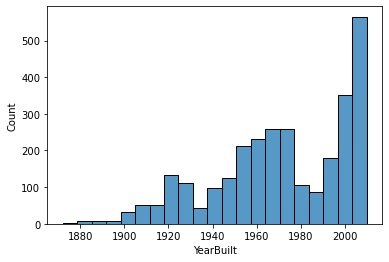

YearRemodAdd  max:  2010
YearRemodAdd  min:  1950


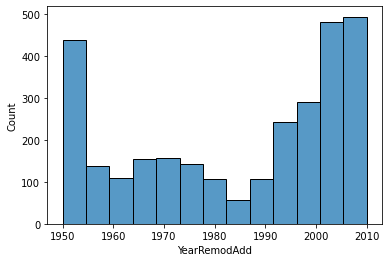

GarageYrBlt  max:  2207.0
GarageYrBlt  min:  1895.0


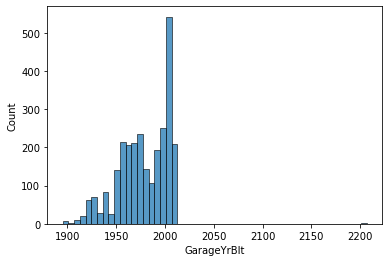

YrSold  max:  2010
YrSold  min:  2006


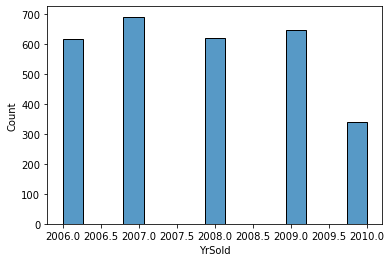

In [10]:
## special columns
# year: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
#data_all[year_columns][:5]

for col in year_columns:
    print(col, ' max: ', data_all[col].max())
    print(col, ' min: ', data_all[col].min())
    sns.histplot(data=data_all[col])
    plt.show()

# try to treat as number

In [11]:
# special columns
# MSSubClass - values are category types
# MoSold - months

# treat as string

In [12]:
## correlation
corr_matrix = data_train_raw.drop(['Id'], axis=1).corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

# graph, too big
#f, ax = plt.subplots(figsize=(30, 19))
#sns.set(font_scale=1.45)
#sns.heatmap(corr_matrix, square=True,cmap='coolwarm');

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64